In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('JetRail.csv')
df_serie=pd.read_csv('JetRail.csv', parse_dates=True, index_col=0, squeeze=True)

In [44]:
df.head()

,Datetime,Count
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [45]:
df_serie.head()

Datetime
2012-08-25 00:00:00    8
2012-08-25 01:00:00    2
2012-08-25 02:00:00    6
2012-08-25 03:00:00    2
2012-08-25 04:00:00    2
Name: Count, dtype: int64

In [46]:
df.dtypes

Datetime    object
Count        int64
dtype: object

We have two columns here – so it’s clearly a univariate time series. Also, the data type of the date variable is taken as an object, i.e. it is being treated as a categorical variable. Hence, we will need to convert this into a DateTime variable. We can do this using the appropriately titled datetime function in Pandas:

In [47]:
df['Datetime'] = pd.to_datetime(df['Datetime'],format='%d-%m-%Y %H:%M')
df.dtypes

Datetime    datetime64[ns]
Count                int64
dtype: object

<AxesSubplot:>

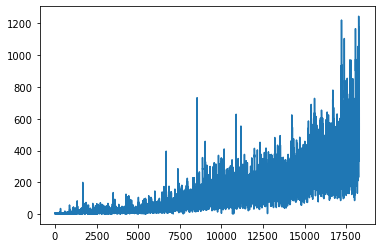

In [48]:
df['Count'].plot()

<AxesSubplot:xlabel='Datetime'>

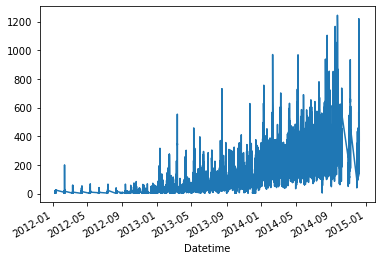

In [49]:
df_serie.plot()

Now that we have the data ready, let’s look at the different features we can engineer from this variable. Along with each of these feature engineering techniques, we will discuss different scenarios where that particular technique can be useful.

NOTE: I have taken a simple time series problem to demonstrate the different feature engineering techniques in this article. You can use them on a dataset of your choice as long as the date-time column is present.

## Feature Engineering for Time Series 1: Date-Related Features
Have you ever worked in a product company? You’ll be intimately familiar with the task of forecasting the sales for a particular product. We can find out the sales pattern for weekdays and weekends based on historical data. Thus, having information about the day, month, year, etc. can be useful for forecasting the values.

Let’s get back to our JetRail project.

**We have to forecast the count of people who will take the JetRail on an hourly basis for the next 7 months.** This number could be higher for weekdays and lower for weekends or during the festive seasons. Hence, the day of the week (weekday or weekend) or month will be an important factor.

Extracting these features is really easy in Python:

In [53]:
df['year']=df['Datetime'].dt.year 
df['month']=df['Datetime'].dt.month 
df['day']=df['Datetime'].dt.day

df['dayofweek_num']=df['Datetime'].dt.dayofweek  
df['dayofweek_name']=df['Datetime'].dt.day_name()

df.head(50)

,Datetime,Count,year,month,day,dayofweek_num,dayofweek_name
0,2012-08-25 00:00:00,8,2012,8,25,5,Saturday
1,2012-08-25 01:00:00,2,2012,8,25,5,Saturday
2,2012-08-25 02:00:00,6,2012,8,25,5,Saturday
3,2012-08-25 03:00:00,2,2012,8,25,5,Saturday
4,2012-08-25 04:00:00,2,2012,8,25,5,Saturday
5,2012-08-25 05:00:00,2,2012,8,25,5,Saturday
6,2012-08-25 06:00:00,2,2012,8,25,5,Saturday
7,2012-08-25 07:00:00,2,2012,8,25,5,Saturday
8,2012-08-25 08:00:00,6,2012,8,25,5,Saturday
9,2012-08-25 09:00:00,2,2012,8,25,5,Saturday


## Feature Engineering for Time Series 2: Time-Based Features

We can similarly extract more granular features if we have the time stamp. For instance, we can determine the hour or minute of the day when the data was recorded and compare the trends between the business hours and non-business hours.

If we are able to extract the ‘hour’ feature from the time stamp, we can make more insightful conclusions about the data. We could find out if the traffic on JetRail is higher during the morning, afternoon or evening time. Or we could use the value to determine the average hourly traffic throughout the week, i.e. the number of people who used JetRail between 9-10 am, 10-11 am, and so on (throughout the week).

Extracting time-based features is very similar to what we did above when extracting date-related features. We start by converting the column to DateTime format and use the .dt accessor. Here’s how to do it in Python:



In [55]:
df['Hour'] = df['Datetime'].dt.hour 
df['minute'] = df['Datetime'].dt.minute 

df.head(50)

,Datetime,Count,year,month,day,dayofweek_num,dayofweek_name,Hour,minute
0,2012-08-25 00:00:00,8,2012,8,25,5,Saturday,0,0
1,2012-08-25 01:00:00,2,2012,8,25,5,Saturday,1,0
2,2012-08-25 02:00:00,6,2012,8,25,5,Saturday,2,0
3,2012-08-25 03:00:00,2,2012,8,25,5,Saturday,3,0
4,2012-08-25 04:00:00,2,2012,8,25,5,Saturday,4,0
5,2012-08-25 05:00:00,2,2012,8,25,5,Saturday,5,0
6,2012-08-25 06:00:00,2,2012,8,25,5,Saturday,6,0
7,2012-08-25 07:00:00,2,2012,8,25,5,Saturday,7,0
8,2012-08-25 08:00:00,6,2012,8,25,5,Saturday,8,0
9,2012-08-25 09:00:00,2,2012,8,25,5,Saturday,9,0


<AxesSubplot:xlabel='Hour'>

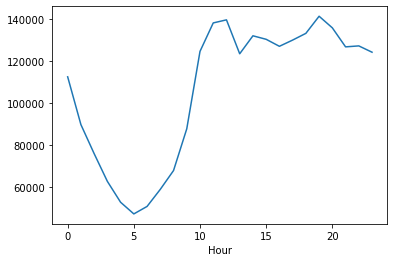

In [57]:
df.groupby('Hour')['Count'].sum().plot()

<AxesSubplot:xlabel='Hour'>

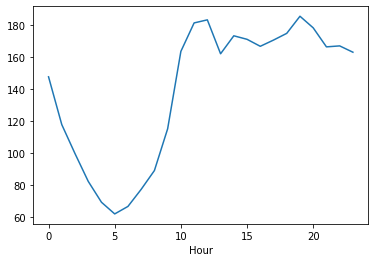

In [61]:
df.groupby('Hour')['Count'].mean().plot()

## Feature Engineering for Time Series 3: Lag Features

Here’s something most aspiring data scientists don’t think about when working on a time series problem – we can also use the target variable for feature engineering!

Consider this – you are predicting the stock price for a company. So, the previous day’s stock price is important to make a prediction, right? In other words, the value at time t is greatly affected by the value at time t-1. The past values are known as lags, so t-1 is lag 1, t-2 is lag 2, and so on.

In [62]:
df['lag_1'] = df['Count'].shift(1)
df = df[['Datetime', 'lag_1', 'Count']]
df.head()

,Datetime,lag_1,Count
0,2012-08-25 00:00:00,NaN,8
1,2012-08-25 01:00:00,8.0,2
2,2012-08-25 02:00:00,2.0,6
3,2012-08-25 03:00:00,6.0,2
4,2012-08-25 04:00:00,2.0,2


Here, we were able to generate lag one feature for our series. But why lag one? Why not five or seven? That’s a good question.

The lag value we choose will depend on the correlation of individual values with its past values.

If the series has a weekly trend, which means the value last Monday can be used to predict the value for this Monday, you should create lag features for seven days. Getting the drift?

We can create multiple lag features as well! Let’s say we want lag 1 to lag 7 – we can let the model decide which is the most valuable one. So, if we train a linear regression model, it will assign appropriate weights (or coefficients) to the lag features:

In [65]:
df['lag_1'] = df['Count'].shift(1)
df['lag_2'] = df['Count'].shift(2)
df['lag_3'] = df['Count'].shift(3)
df['lag_4'] = df['Count'].shift(4)
df['lag_5'] = df['Count'].shift(5)
df['lag_6'] = df['Count'].shift(6)
df['lag_7'] = df['Count'].shift(7)

df = df[['Datetime', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'Count']]
df.head(20)

,Datetime,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,Count
0,2012-08-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1,2012-08-25 01:00:00,8.0,NaN,NaN,NaN,NaN,NaN,NaN,2
2,2012-08-25 02:00:00,2.0,8.0,NaN,NaN,NaN,NaN,NaN,6
3,2012-08-25 03:00:00,6.0,2.0,8.0,NaN,NaN,NaN,NaN,2
4,2012-08-25 04:00:00,2.0,6.0,2.0,8.0,NaN,NaN,NaN,2
5,2012-08-25 05:00:00,2.0,2.0,6.0,2.0,8.0,NaN,NaN,2
6,2012-08-25 06:00:00,2.0,2.0,2.0,6.0,2.0,8.0,NaN,2
7,2012-08-25 07:00:00,2.0,2.0,2.0,2.0,6.0,2.0,8.0,2
8,2012-08-25 08:00:00,2.0,2.0,2.0,2.0,2.0,6.0,2.0,6
9,2012-08-25 09:00:00,6.0,2.0,2.0,2.0,2.0,2.0,6.0,2


There is more than one way of determining the lag at which the correlation is significant. For instance, we can use the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots.

* ACF: The ACF plot is a measure of the correlation between the time series and the lagged version of itself
* PACF: The PACF plot is a measure of the correlation between the time series with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons
For our particular example, here are the ACF and PACF plots:

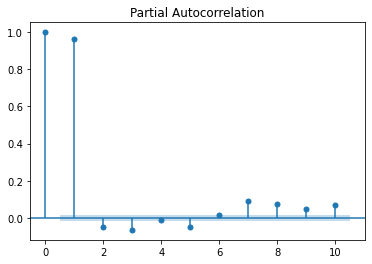

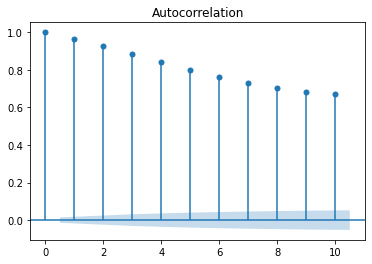

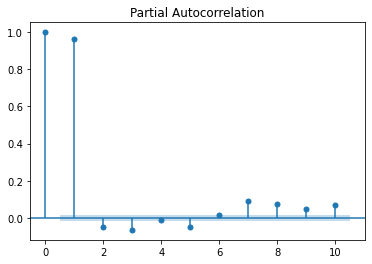

In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Count'], lags=10)
plot_pacf(df['Count'], lags=10)

The partial autocorrelation function shows a high correlation with the first lag and lesser correlation with the second and third lag. The autocorrelation function shows a slow decay, which means that the future values have a very high correlation with its past values.

An important point to note – the number of times you shift, the same number of values will be reduced from the data. You would see some rows with NaNs at the start. That’s because the first observation has no lag. You’ll need to discard these rows from the training data.

## Feature Engineering for Time Series 4: Rolling Window Feature
In the last section, we looked at how we can use the previous values as features.

How about calculating some statistical values based on past values? This method is called the rolling window method because the window would be different for every data point.

Here’s an awesome gif that explains this idea in a wonderfully intuitive way:

Since this looks like a window that is sliding with every next point, the features generated using this method are called the ‘rolling window’ features.

Now the question we need to address – how are we going to perform feature engineering here? Let’s start simple. We will select a window size, take the average of the values in the window, and use it as a feature. Let’s implement it in Python:

In [70]:
df['rolling_mean'] = df['Count'].rolling(window=7).mean()
df = df[['Datetime', 'rolling_mean', 'Count']]
df.head(10)

,Datetime,rolling_mean,Count
0,2012-08-25 00:00:00,NaN,8
1,2012-08-25 01:00:00,NaN,2
2,2012-08-25 02:00:00,NaN,6
3,2012-08-25 03:00:00,NaN,2
4,2012-08-25 04:00:00,NaN,2
5,2012-08-25 05:00:00,NaN,2
6,2012-08-25 06:00:00,3.428571,2
7,2012-08-25 07:00:00,2.571429,2
8,2012-08-25 08:00:00,3.142857,6
9,2012-08-25 09:00:00,2.571429,2


Similarly, you can consider the sum, min, max value, etc. (for the selected window) as a feature and try it out on your own machine.

Recency in an important factor in a time series. Values closer to the current date would hold more information.

Thus, we can use a weighted average, such that higher weights are given to the most recent observations. Mathematically, weighted average at time t for the past 7 values would be:

w_avg = w1*(t-1) + w2*(t-2) + .  .  .  .  + w7*(t-7)

where, w1>w2>w3> .  .   . . >w7.

## Feature Engineering for Time Series #5: Expanding Window Feature
This is simply an advanced version of the rolling window technique. In the case of a rolling window, the size of the window is constant while the window slides as we move forward in time. Hence, we consider only the most recent values and ignore the past values.

The idea behind the expanding window feature is that it takes all the past values into account.

Here’s a gif that explains how our expanding window function works:

As you can see, with every step, the size of the window increases by one as it takes into account every new value in the series. This can be implemented easily in Python by using the expanding() function. Let’s code this using the same data:

In [71]:
df['expanding_mean'] = df['Count'].expanding(2).mean()
df = df[['Datetime','Count', 'expanding_mean']]
df.head(10)

,Datetime,Count,expanding_mean
0,2012-08-25 00:00:00,8,NaN
1,2012-08-25 01:00:00,2,5.000000
2,2012-08-25 02:00:00,6,5.333333
3,2012-08-25 03:00:00,2,4.500000
4,2012-08-25 04:00:00,2,4.000000
5,2012-08-25 05:00:00,2,3.666667
6,2012-08-25 06:00:00,2,3.428571
7,2012-08-25 07:00:00,2,3.250000
8,2012-08-25 08:00:00,6,3.555556
9,2012-08-25 09:00:00,2,3.400000


## Feature Engineering for Time Series #6: Domain-Specific Features
This is the essence of feature engineering!

Having a good understanding of the problem statement, clarity of the end objective and knowledge of the available data is essential to engineer domain-specific features for the model.

Want to dive into this more? Let’s take an example.

Below is the data provided by a retailer for a number of stores and products. Our task is to forecast the future demands for the products. We can come up with various features, like taking a lag or averaging the past values, among other things.

But hold on. Let me ask you a question – would it be the right way to build lag features from lag(1) to lag(7) throughout the data?

Certainly not! There are different stores and products, and the demand for each store and product would be significantly different. In this case, we can create lag features considering the store-product combination. Moreover, if we have knowledge about the products and the trends in the market, we would be able to generate more accurate (and fewer) features.

Not only this, having a good understanding about the domain and data would help us in selecting the lag value and the window size. Additionally, based on your domain knowledge, you would be able to pull external data that adds more value to the model.
Here’s what I mean – are the sales affected by the weather on the day? Will the sales increase/decrease on a national holiday? If yes, then you can use external datasets and include the list of holidays as a feature.

 

Validation Technique for Time Series
All the feature engineering techniques we have discussed can be used to convert a time series problem into a supervised machine learning problem.

Once we have that, we can easily go ahead with machine learning algorithms like linear regression and random forest. But there is one important step that you should know before you jump to the model building process – creating a validation set for time series.

For the traditional machine learning problems, we randomly select subsets of data for the validation and test sets. But in these cases, each data point is dependent on its past values. If we randomly shuffle the data, we might be training on future data and predicting the past values!

It is important that we carefully build a validation set when working on a time series problem, without destroying the sequential order within the data.

Let’s create a validation set for our problem. But first, we must check the duration for which we have the data:
```
import pandas as pd
data = pd.read_csv('Train_SU63ISt.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')
data['Datetime'].min(), data['Datetime'].max(), (data['Datetime'].max() -data['Datetime'].min())
(Timestamp('2012-08-25 00:00:00'),
 Timestamp('2014-09-25 23:00:00'),
 Timedelta('761 days 23:00:00'))
We have data for almost 25 months. Let’s save three months for validation and use the remaining for training:

data.index = data.Datetime
Train=data.loc['2012-08-25':'2014-06-24'] 
valid=data.loc['2014-06-25':'2014-09-25']
```

Train.shape, valid.shape
((16056, 3), (2232, 3))
Great! We have the train and validation sets ready. You can now use these feature engineering techniques and build machine learning models on this data!

 

End Notes
Time Series is often considered a difficult topic to master. That’s understandable because there are a lot of moving parts when we’re working with the date and time components. But once you have a hang of the basic concepts and are able to perform feature engineering, you’ll be gliding through your projects in no time.

In this article, we discussed some simple techniques that you can use to work with time series data. Using these feature engineering techniques, we can convert any time series problem into a supervised learning problem and build regression models.

Have any questions? Or want to share any other feature engineering techniques for time series? Let’s discuss in the comments section below.

And if you’re new to the world of time series, here is an excellent (and free) course to get you started: Creating Time Series Forecast using Python.